In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000822662"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000822662
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,FIDELITY SOUTHERN CORP
Ticker,LION


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,57.0,1.107421e+01,2.373137e+00,8.25,8.94,10.41,12.9,16.61
interest income,56.0,2.855305e+07,7.851706e+06,15294000.00,23892750.00,25835000.00,30458500.0,48271000.00
net income,57.0,5.059354e+06,4.662613e+06,-7569000.00,2110000.00,4869000.00,8167000.0,15065000.00
net interest income,56.0,2.070650e+07,9.132173e+06,9259000.00,11996750.00,19777500.00,25889250.0,39558000.00
provision for loan losses,56.0,2.851893e+06,3.043491e+06,-2450000.00,748750.00,1979500.00,4425000.0,14700000.00
total revenue,14.0,7.220021e+07,7.783437e+06,59178000.00,67718000.00,72576000.00,77774250.0,85430000.00


# Plots

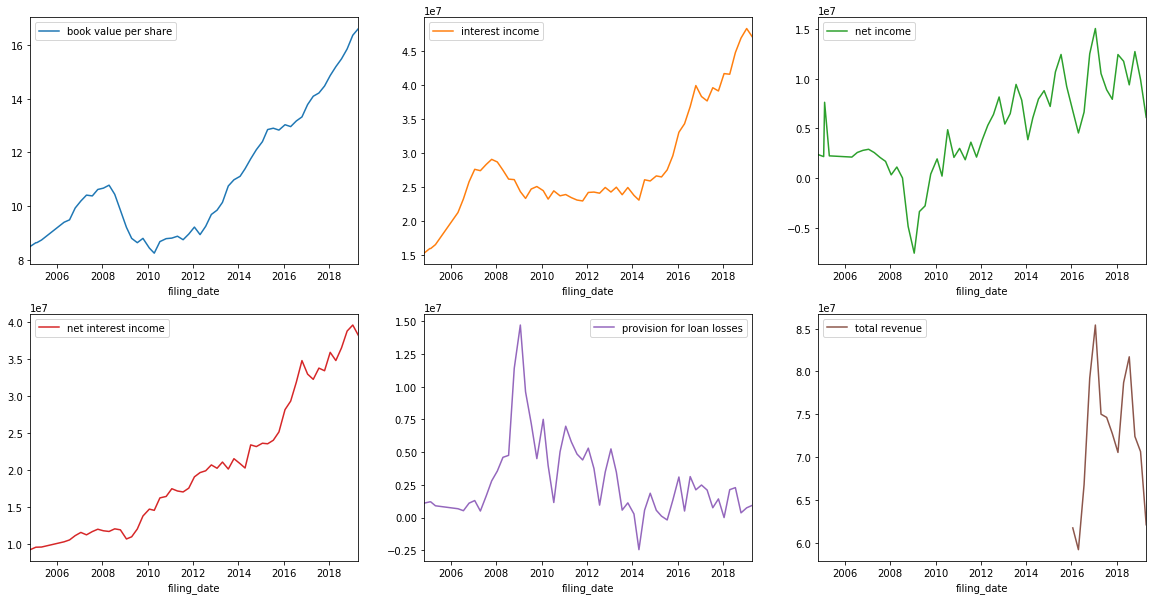

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period   msg_type  \
cik        item                                                                 
0000822662 book value per share        2005Q2 to 2005Q4: 3 periods    missing   
           interest income             2005Q2 to 2005Q4: 3 periods    missing   
           net income                                       2004Q4  duplicate   
           net income                  2005Q2 to 2005Q4: 3 periods    missing   
           net interest income         2005Q2 to 2005Q4: 3 periods    missing   
           provision for loan losses   2005Q2 to 2005Q4: 3 periods    missing   
           total revenue              2004Q3 to 2015Q3: 45 periods    missing   

                                               message  
cik        item                                         
0000822662 book value per share         Missing period  
           interest income              Missing period  
           net income                 Duplicate period  
           net income                   Missing period  
           net interest income          Missing period  
           provision for loan losses    Missing period  
           total revenue                Missing period

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()